# Introduction

The provided code creates a range of dates spanning seven days starting from January 1, 2017, and then iterates over these dates to print the number and name of the weekday for each date. 

In [17]:
# Libraries required
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# Create the range of dates here
# Function from the pandas library to create a DateTimeIndex containing seven dates. 
seven_days = pd.date_range(start='2017-1-1', periods=7, freq='D') 

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.day_name())

6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


# Step 1: Getting Sample Data

To get the last 2 years of stock closing prices using pandas, you'll typically follow these steps:

1. Import the necessary libraries, including pandas and any other libraries you'll use for data retrieval (e.g., yfinance for Yahoo Finance data).
2. Retrieve the historical stock data, including the date and closing prices for the desired stock.
3. Filter the data to include only the last 2 years of data.

In this example, we:

1. Import pandas and yfinance.
2. Define the stock symbol (e.g., "JKHY") and the date range by specifying the end date as today's date and the start date as two years ago using `pd.DateOffset`.
3. Use the `yf.download` function from yfinance to fetch historical stock data for the specified symbol and date range. This function returns a DataFrame with various columns, including the "Close" column, which contains the closing prices.
4. Extract the closing prices by selecting the "Close" column from the DataFrame, which gives you a pandas Series containing the closing prices for the last 2 years.


In [19]:
import pandas as pd
import yfinance as yf
import datetime

# Set the stock symbol and date range
stock_symbol = "JKHY"
end_date = datetime.date.today()
start_date = end_date - pd.DateOffset(years=5)

# Fetch the stock data from Yahoo Finance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Extract the closing prices for the last 2 years
closing_prices_last_5_years = stock_data['Close']

print("-" * 120)
print('Dataframe: ')
print("-" * 120)
print()  # This will print an empty line
                                                                    
print(stock_data.head())

print("-" * 120)
print('Series:')
print("-" * 120)

print(closing_prices_last_5_years.head())



[*********************100%%**********************]  1 of 1 completed
------------------------------------------------------------------------------------------------------------------------
Dataframe: 
------------------------------------------------------------------------------------------------------------------------

                  Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2018-10-10  156.270004  156.949997  149.809998  150.039993  141.754471  606300
2018-10-11  150.000000  151.490005  147.149994  147.320007  139.184662  658200
2018-10-12  149.820007  152.350006  147.690002  150.080002  141.792252  500200
2018-10-15  149.570007  151.190002  148.320007  149.770004  141.499374  394400
2018-10-16  151.169998  154.429993  150.270004  154.229996  145.713058  302600
------------------------------------------------------------------------------------------------------------------------
Se

## Inspect Dataframe and Pandas Series

1. What is the difference?
2. What is a DatetimeIndex

In [20]:
# Dataframe
print(stock_data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2018-10-10 to 2023-10-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1257 non-null   float64
 1   High       1257 non-null   float64
 2   Low        1257 non-null   float64
 3   Close      1257 non-null   float64
 4   Adj Close  1257 non-null   float64
 5   Volume     1257 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.7 KB
None


In [21]:
# Series
print(closing_prices_last_5_years.info())

<class 'pandas.core.series.Series'>
DatetimeIndex: 1257 entries, 2018-10-10 to 2023-10-09
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
1257 non-null   float64
dtypes: float64(1)
memory usage: 19.6 KB
None


## Answer: What is the difference?

The main difference between the two objects you've provided, a pandas DataFrame and a pandas Series, lies in their data structure and the way they store and represent data.

1. **DataFrame**:

   - **Data Structure**: A DataFrame is a 2-dimensional tabular data structure. It consists of rows and columns, where each column can contain different types of data (e.g., numbers, text, or even other data structures like Series). It is essentially a collection of Series objects, where each column is a Series.
   - **Description**: In your example, the DataFrame has 501 rows and 6 columns. Each column represents a specific attribute or feature, such as "Open," "High," "Low," "Close," "Adj Close," and "Volume." These columns can store different types of data (e.g., float64 for numeric data and int64 for integers).
   - **Memory Usage**: DataFrames generally consume more memory than Series because they store multiple columns of data along with row and column labels. In your case, it uses approximately 27.4 KB of memory.

2. **Series**:

   - **Data Structure**: A Series is a 1-dimensional labeled array-like object. It can be thought of as a single column or a single attribute from a DataFrame. Series objects contain data and a label or name associated with the data.
   - **Description**: In your example, the Series represents the "Close" attribute or column from the DataFrame. It has 501 entries (rows) and stores numeric data with the "float64" data type. The name of the Series is "Close."
   - **Memory Usage**: Series typically consume less memory than DataFrames because they represent a single column of data with a single label. In your case, it uses approximately 7.8 KB of memory.

In summary, a DataFrame is a 2-dimensional data structure that can store multiple columns of data with potentially different data types, while a Series is a 1-dimensional data structure that represents a single column of data from a DataFrame. The choice between using a DataFrame or a Series depends on the specific data manipulation or analysis tasks you need to perform. DataFrames are more suitable for working with structured data with multiple attributes, while Series are useful when you are primarily interested in one specific attribute or column of data.

## Answer: What is DatetimeIndex and where did it come from?
The `yf.download` function from the `yfinance` library typically creates a `DatetimeIndex` as part of the resulting DataFrame. The `DatetimeIndex` represents the dates associated with each row of historical stock data. This index is automatically generated based on the date information in the downloaded data.

Here's how it works:

1. When you use `yf.download` to fetch historical stock data, one of the columns in the resulting DataFrame will be the "Date" column, which contains date information for each data point.
2. By default, `yfinance` creates a `DatetimeIndex` from the "Date" column, which makes it convenient to work with time series data in pandas. This index allows you to easily access and manipulate the data based on date-related criteria.

## Comparison

         2019
0  124.190002
1  121.230003
2  124.040001
3  123.820000
4  125.919998
         2020
0  145.889999
1  145.720001
2  146.729996
3  146.479996
4  146.710007
         2021
0  158.660004
1  159.110001
2  161.490005
3  164.940002
4  166.949997
         2022
0  171.500000
1  174.660004
2  172.919998
3  169.600006
4  169.750000
         2019        2020        2021        2022
0  124.190002  145.889999  158.660004  171.500000
1  121.230003  145.720001  159.110001  174.660004
2  124.040001  146.729996  161.490005  172.919998
3  123.820000  146.479996  164.940002  169.600006
4  125.919998  146.710007  166.949997  169.750000


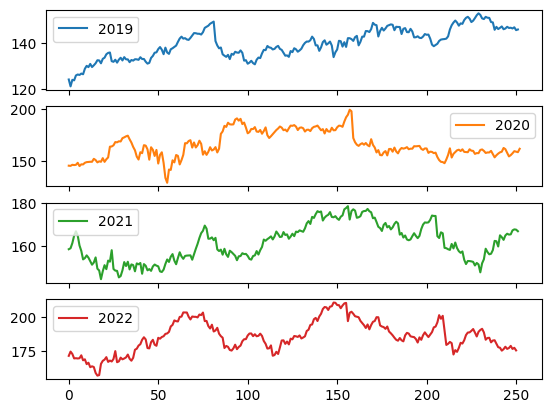

In [22]:
# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in ['2019', '2020', '2021', '2022']:
    # create a new dataframe based on the year
    price_per_year = stock_data.loc[year, ['Close']].reset_index(drop=True)
    # rename the price column to the current year being processed
    price_per_year.rename(columns={'Close': year}, inplace=True)
    print(price_per_year.head())
    prices = pd.concat([prices, price_per_year], axis=1)
    

# Plot prices
print(prices.head())
prices.plot(subplots=True)
plt.show()

## Question: Why do we reset_index()?

In the provided code, the `reset_index(drop=True)` method is applied to the DataFrame `price_per_year` inside the loop. Here's what it does:

1. `reset_index()` is used to reset the index of the DataFrame.
2. `drop=True` is specified to remove the old index column, which is added by default when you reset the index. If you don't specify `drop=True`, the old index column will become a new column in the DataFrame.

In this specific code, resetting the index with `drop=True` effectively removes the existing index and replaces it with a default numeric index, starting from 0. This is useful when you want to remove any previous index and have a fresh, continuous numeric index for the `price_per_year` DataFrame.

The primary purpose of this operation seems to be to ensure that each `price_per_year` DataFrame has a consistent, simple numeric index, which simplifies the subsequent concatenation (`pd.concat`) of these DataFrames into the `prices` DataFrame. It ensures that each year's data starts with an index of 0, making it easier to align the data during concatenation.

# Step 2: Change from Date to DateTime and setting as index

What if you don't get a dataframe and you need to take a date field and convert to the dataframe's index?

------------------------------------------------------------------------------------------------------------------------
Before:
------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6317 non-null   object 
 1   ozone   6317 non-null   float64
 2   pm25    6317 non-null   float64
 3   co      6317 non-null   float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB
None

------------------------------------------------------------------------------------------------------------------------
After:
------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3

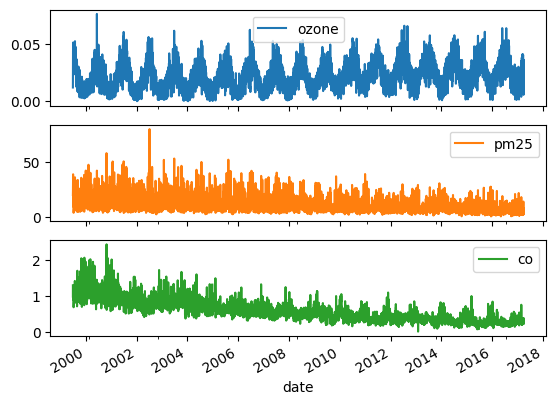

In [23]:
data = pd.read_csv('./data/nyc.csv')

# Inspect data
print('-' * 120)
print('Before:')
print('-' * 120)
print(data.info())

# Convert the date column to datetime64
data['date'] = pd.to_datetime(data['date'])

# Set date column as index
data.set_index('date', inplace=True)

# Inspect data
#  
print('')
print('-' * 120)
print('After:')
print('-' * 120)
print(data.info())


# Plot data
data.plot(subplots=True)
print('')
print('-' * 120)
print('Plot:')
print('-' * 120)
plt.show()